<a href="https://colab.research.google.com/github/ORPHIC-SAGE/eso.tech/blob/main/Copy_of_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
print(X_train)

[[ 0.90832902  0.91569367  0.44912368 ...  0.37852648  0.67740401
   1.69955804]
 [ 0.03644676 -0.75182191 -0.47230103 ... -0.50667229 -0.07049698
  -0.96569189]
 [-1.12606292  1.38763205  1.06340683 ...  2.54094063 -0.11855487
  -0.88240283]
 ...
 [ 0.03644676 -0.84620959 -0.21634972 ... -0.94927168 -0.95656442
  -1.04898095]
 [ 2.0708387  -1.12937261  0.24436264 ... -0.26640405 -0.50001442
   0.11706589]
 [ 0.32707418  0.47521786  0.65388473 ... -4.07275877  0.52121586
   2.94889395]]


In [10]:
print(X_test)

[[1.000e+00 1.990e+02 7.600e+01 ... 4.290e+01 1.394e+00 2.200e+01]
 [2.000e+00 1.070e+02 7.400e+01 ... 3.360e+01 4.040e-01 2.300e+01]
 [4.000e+00 7.600e+01 6.200e+01 ... 3.400e+01 3.910e-01 2.500e+01]
 ...
 [4.000e+00 1.420e+02 8.600e+01 ... 4.400e+01 6.450e-01 2.200e+01]
 [3.000e+00 1.160e+02 7.400e+01 ... 2.630e+01 1.070e-01 2.400e+01]
 [1.000e+00 1.070e+02 7.200e+01 ... 3.080e+01 8.210e-01 2.400e+01]]


In [11]:
print(y_train)

[1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1
 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1
 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 1 

In [12]:
print(y_test)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [5]:
print(X_train)

[[ 0.90832902  0.91569367  0.44912368 ...  0.37852648  0.67740401
   1.69955804]
 [ 0.03644676 -0.75182191 -0.47230103 ... -0.50667229 -0.07049698
  -0.96569189]
 [-1.12606292  1.38763205  1.06340683 ...  2.54094063 -0.11855487
  -0.88240283]
 ...
 [ 0.03644676 -0.84620959 -0.21634972 ... -0.94927168 -0.95656442
  -1.04898095]
 [ 2.0708387  -1.12937261  0.24436264 ... -0.26640405 -0.50001442
   0.11706589]
 [ 0.32707418  0.47521786  0.65388473 ... -4.07275877  0.52121586
   2.94889395]]


In [6]:
print(y_train)

[1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1
 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1
 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 1 

In [7]:
print(X_test)

[[1.000e+00 1.990e+02 7.600e+01 ... 4.290e+01 1.394e+00 2.200e+01]
 [2.000e+00 1.070e+02 7.400e+01 ... 3.360e+01 4.040e-01 2.300e+01]
 [4.000e+00 7.600e+01 6.200e+01 ... 3.400e+01 3.910e-01 2.500e+01]
 ...
 [4.000e+00 1.420e+02 8.600e+01 ... 4.400e+01 6.450e-01 2.200e+01]
 [3.000e+00 1.160e+02 7.400e+01 ... 2.630e+01 1.070e-01 2.400e+01]
 [1.000e+00 1.070e+02 7.200e+01 ... 3.080e+01 8.210e-01 2.400e+01]]


In [8]:
print(y_test)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]


## Training the Logistic Regression model on the Training set

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [15]:
print(classifier.predict(sc.transform([[6,148,72,35,0,33.6,0.627,50]])))

[1]


## Predicting the Test set results

In [16]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]

## Making the Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  0 107]
 [  0  47]]


0.3051948051948052

## Visualising the Training set results

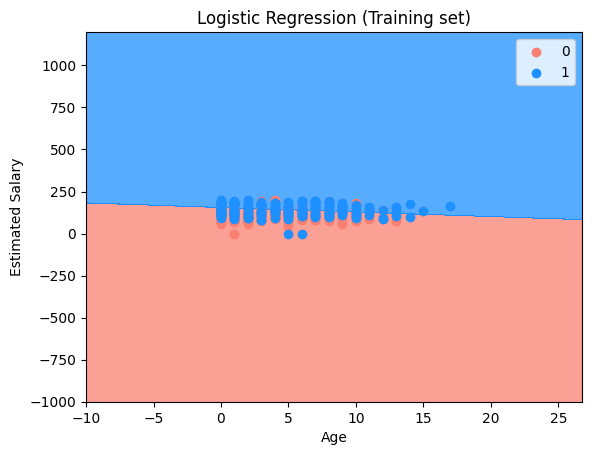

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train

# Calculate the mean of the features from the original training set (X_set)
# This will be used to fill the other feature dimensions for visualization
X_mean = X_set.mean(axis=0)

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

# Create a dummy array with the correct number of features (8) for the scaler
# The first two features will be X1 and X2 from the meshgrid
# The remaining features will be filled with their respective means from the training data
X_grid_8_features = np.zeros((X1.size, X_set.shape[1]))
X_grid_8_features[:, 0] = X1.ravel()
X_grid_8_features[:, 1] = X2.ravel()
# Fill the remaining features with their means
for i in range(2, X_set.shape[1]):
    X_grid_8_features[:, i] = X_mean[i]

# Transform the 8-feature grid and then predict
plt.contourf(X1, X2, classifier.predict(sc.transform(X_grid_8_features)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

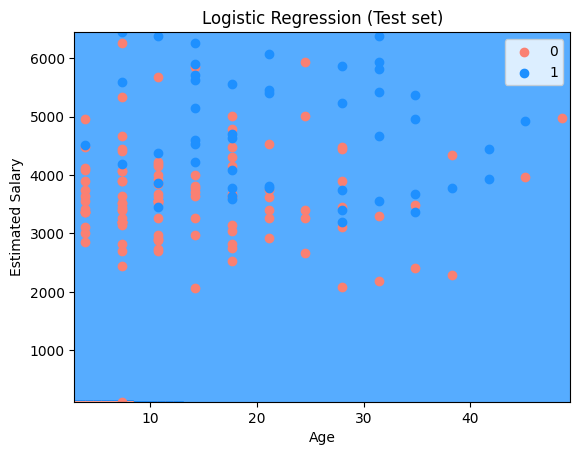

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
# Create a grid of points
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.25)
)
# Create a dummy array with the correct number of features (8) for the scaler
# The first two features will be X1 and X2 from the meshgrid
# The remaining features will be filled with their respective means from the training data (X_mean)
X_grid_8_features_test = np.zeros((X1.size, X_set.shape[1]))
X_grid_8_features_test[:, 0] = X1.ravel()
X_grid_8_features_test[:, 1] = X2.ravel()
# Fill the remaining features with their means from X_mean (computed from training data)
for i in range(2, X_set.shape[1]):
    X_grid_8_features_test[:, i] = X_mean[i]
# Predict for each point on the grid after transforming with the scaler
Z = classifier.predict(sc.transform(X_grid_8_features_test)).reshape(X1.shape)
# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Define colors for scatter plot
colors = ['#FA8072', '#1E90FF']
# Plot the test set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        color=colors[i], label=j
    )
# Add titles and labels
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()